### Time Series Analysis, Forecasting

- 정의 
    + 시계열 분석이란 시간 순서로 정렬된 데이터에서 의미 있는 정보를 추출하는 과정이다.

- 예측
    + 가능한 미래의 확률과 가능성에 대해 추정하는 행위를 의미한다.

- 대상
    + 날씨, 주식, 질병 등 다양한 시계열 데이터를 기반으로 한다.

- 분야
    + 금융, 전통 산업, 전자 산업, 컨설팅, 정부, 중앙은행 및 국제 기구 등 다양한 분야에서 필요로 함
    + 경제학자, 통계학자, 분석가, 데이터 사이언티스트 등 다양한 전문가들이 필요로 함

- 목적
    + 좋은 예측은 좋은 의사결정을 촉진한다
    + 따라서 예측은 사람들이 더 나은 의사결정을 내릴 수 있도록 도움을 준다.
    + **예측(Forecast)**은 의사결정을 안내하는 역할을 한다.

### 예측이 쉬워지기 위한 조건들

1. 예측에 영향을 줄 수 있는 요인들에 대한 깊은 이해가 필요함
2. 가용할 수 있는 데이터가 많아야함
3. 미래의 양상이 과거와 유사해야함
4. 예측이 실제 미래에 영향을 주지 않아야 함

다음은 호주에 방문한 방문객의 수에 대한 시계열 데이터를 시각화한 그래프를 생성하는 코드이다. 그래프를 통해 미래 시점에서의 방문객 수를 예측할 수 있다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 데이터 불러오기
austa = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.2/aus_visit.csv', index_col=0)
austa['Month'] = pd.to_datetime(austa['Month'])
austa.head()

,Month,Visitors
0,1976-01-01,202990
1,1976-02-01,137040
2,1976-03-01,118980
3,1976-04-01,102120
4,1976-05-01,128970


### 지수 평활법 모델

- 주요 개념
    + Level(수준) : 시계열의 평균 수준
    + Trend(추세) : 시계열의 증가 또는 감소하는 경향
    + Seasonality(계절성) : 시계열이 주기적으로 반복되는 패턴
    + Smoothing Parameters(평활 파라미터) : 데이터의 평활에 사용되는 파라미터로, 각각 수준, 추세, 계절성에 대응되는 $\alpha$, $\beta$, $\gamma$ 가 있다.

### 지수 평활법
지수 평활법은 시계열 데이터를 분석하고 예측하는 데 사용되는 중요한 기법이다. 이 방법은 과거 데이터를 기반으로 미래 값을 예측하며, 특히 추세와 계절성을 고려한 예측에서 효과적이다. Holt-Winters 지수 평활법은 세 가지 주요 구성 요소로 나뉜다.
- 단순 지수 평활법(Simple Exponential Smoothing)
- 홀트의 이중 지수 평활법(Holt’s Linear Trend Model)
- 홀트-윈터스의 삼중 지수 평활법(Holt-Winters Seasonal Model)

In [3]:
# 학습 데이터 분리
austa_up_to_2010 = austa[austa['Month'] <= "2010-12-31"]
model = ExponentialSmoothing(austa_up_to_2010['Visitors'], seasonal='add', seasonal_periods=12).fit()

d:\CudaTest\lhw\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [4]:
# 예측
forecast_start_date = '2011-01-01'
forecast_steps = 48
num_simulations = 100

prediction = model.forecast(steps=forecast_steps)

C:\Users\admin\AppData\Local\Temp\ipykernel_16428\2375318138.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month' : pd.date_range(start=forecast_start_date, periods=forecast_steps, freq='M'),


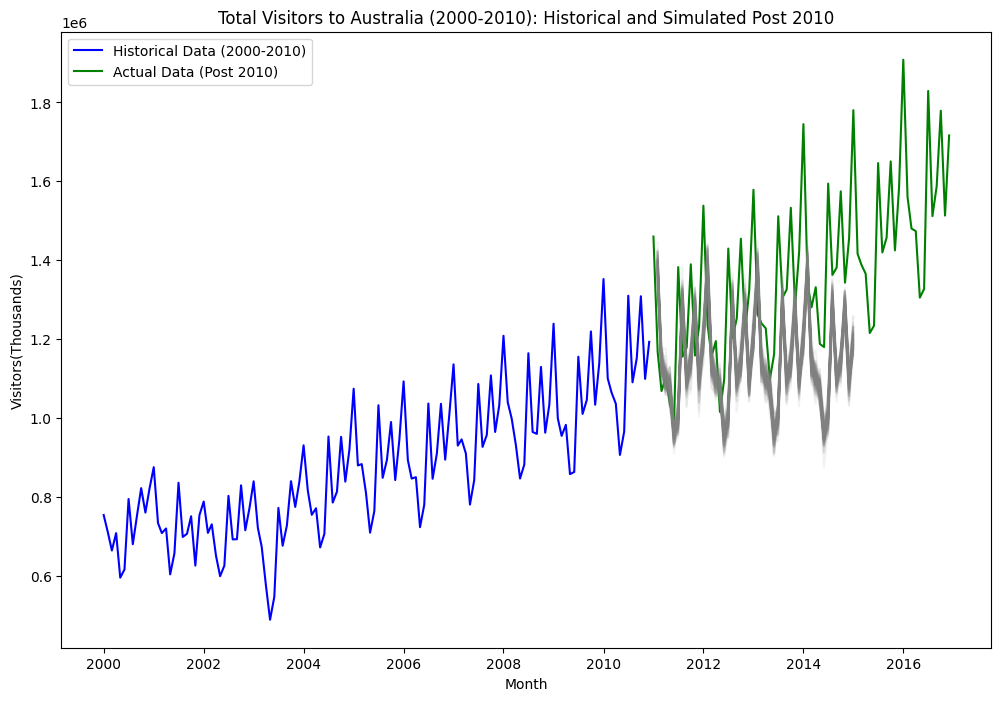

In [5]:
np.random.seed(1967)
simulated_paths = pd.DataFrame()
residual_std = model.resid.std()

for i in range(num_simulations):
    new_residuals = np.random.normal(0, residual_std, size=forecast_steps)
    simulated_forecast = prediction + new_residuals
    simulated_df = pd.DataFrame({
        'Month' : pd.date_range(start=forecast_start_date, periods=forecast_steps, freq='M'),
        'Visitors' : simulated_forecast,
        'Simulation' : i + 1
    })
    simulated_paths = pd.concat([simulated_paths, simulated_df], ignore_index=True)

# 시각화
plt.figure(figsize=(12, 8))
austa_filtered = austa[(austa['Month'] >= '2000-01-01') & (austa['Month'] <= '2010-12-31')]
actual_post_2010 = austa[(austa['Month'] > '2010-12-31') & (austa['Month'] <= '2016-12-31')]
sns.lineplot(data=austa_filtered, x='Month', y='Visitors', label='Historical Data (2000-2010)', color='blue')
sns.lineplot(data=actual_post_2010, x='Month', y='Visitors', label='Actual Data (Post 2010)', color='green')

for i in range(1, num_simulations+1):
    sim_data = simulated_paths[simulated_paths['Simulation'] == i]
    sns.lineplot(data=sim_data, x='Month', y='Visitors', color='gray', alpha=0.1)

plt.title("Total Visitors to Australia (2000-2010): Historical and Simulated Post 2010")
plt.xlabel("Month")
plt.ylabel("Visitors(Thousands)")
plt.legend()
plt.show()